<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220812_Hate_Speech_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/07/25/hate-speech-detection-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [13]:
import pandas as pd
import numpy as np
from nltk.util import pr
import nltk
import re
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))
stemmer, stopword

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/twitter.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
data['count'].value_counts()

3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

In [20]:
data['hate_speech'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

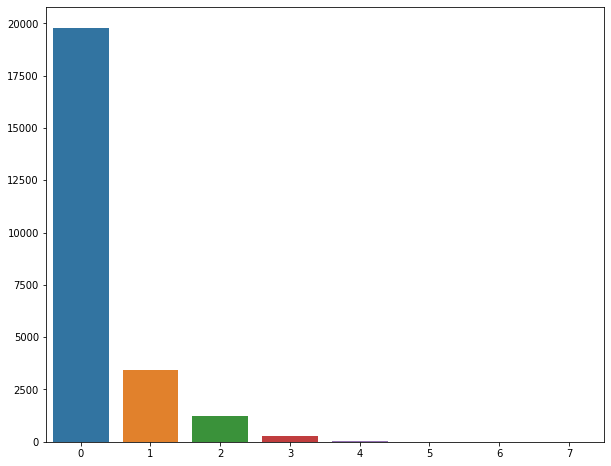

In [21]:
plt.figure(figsize=(10,8))

sns.barplot(data=data, x=data['hate_speech'].value_counts().index, y=data['hate_speech'].value_counts().values)
plt.show()

In [22]:
data['labels'] = data['class'].map({0:'Hate', 1:'Offensive', 2:'No hate or offensive'})
data.head()

,count,hate_speech,offensive_language,neither,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive


In [23]:
df = data[['labels', 'tweet']]
df.head()

,labels,tweet
0,No hate or offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  24783 non-null  object
 1   tweet   24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [26]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [54]:
df['tweet'] = df['tweet'].apply(clean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  24783 non-null  object
 1   tweet   24783 non-null  object
 2   clean   24783 non-null  object
dtypes: object(3)
memory usage: 581.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
x = np.array(df['tweet'])
y = np.array(df['labels'])

In [56]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [57]:
X

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197862 stored elements in Compressed Sparse Row format>

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.33, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((16604, 25693), (8179, 25693), (16604,), (8179,))

In [59]:
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [60]:
sample = 'Lets unite and kill all the people who are protesting against government'
dat = cv.transform([sample]).toarray()

In [61]:
dat

array([[0, 0, 0, ..., 0, 0, 0]])

In [62]:
print(model.predict(dat))

['Hate']


In [63]:
model.score(Xtest, ytest)

0.8722337694094633